<a href="https://colab.research.google.com/github/Jyothsnasri5607/wasteclassification/blob/main/wasteclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")
print("path to dataset files:",path)

100%|██████████| 427M/427M [00:04<00:00, 89.6MB/s]

Extracting files...


path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train_path ="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASETS/TEST"


In [ ]:
#Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
#visualisation
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2123.11it/s]


In [ ]:
data.shape

(22564, 2)

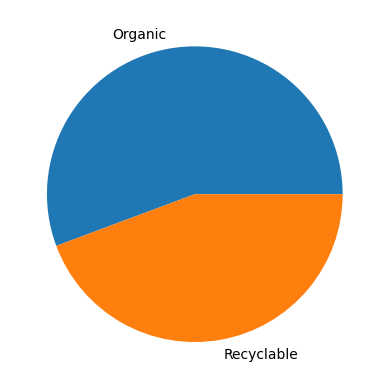

In [ ]:

color = ["#a0d157",'#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'])
plt.show()


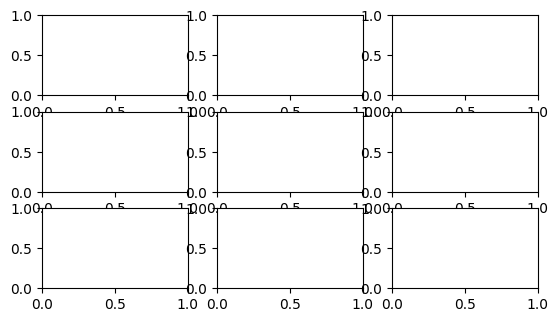

In [ ]:





plt.Figure(figsize=(20,15))
for i in range(9):
  plt.subplot(4, 3, (i%12)+1)
  index = np.random.randint(15000)


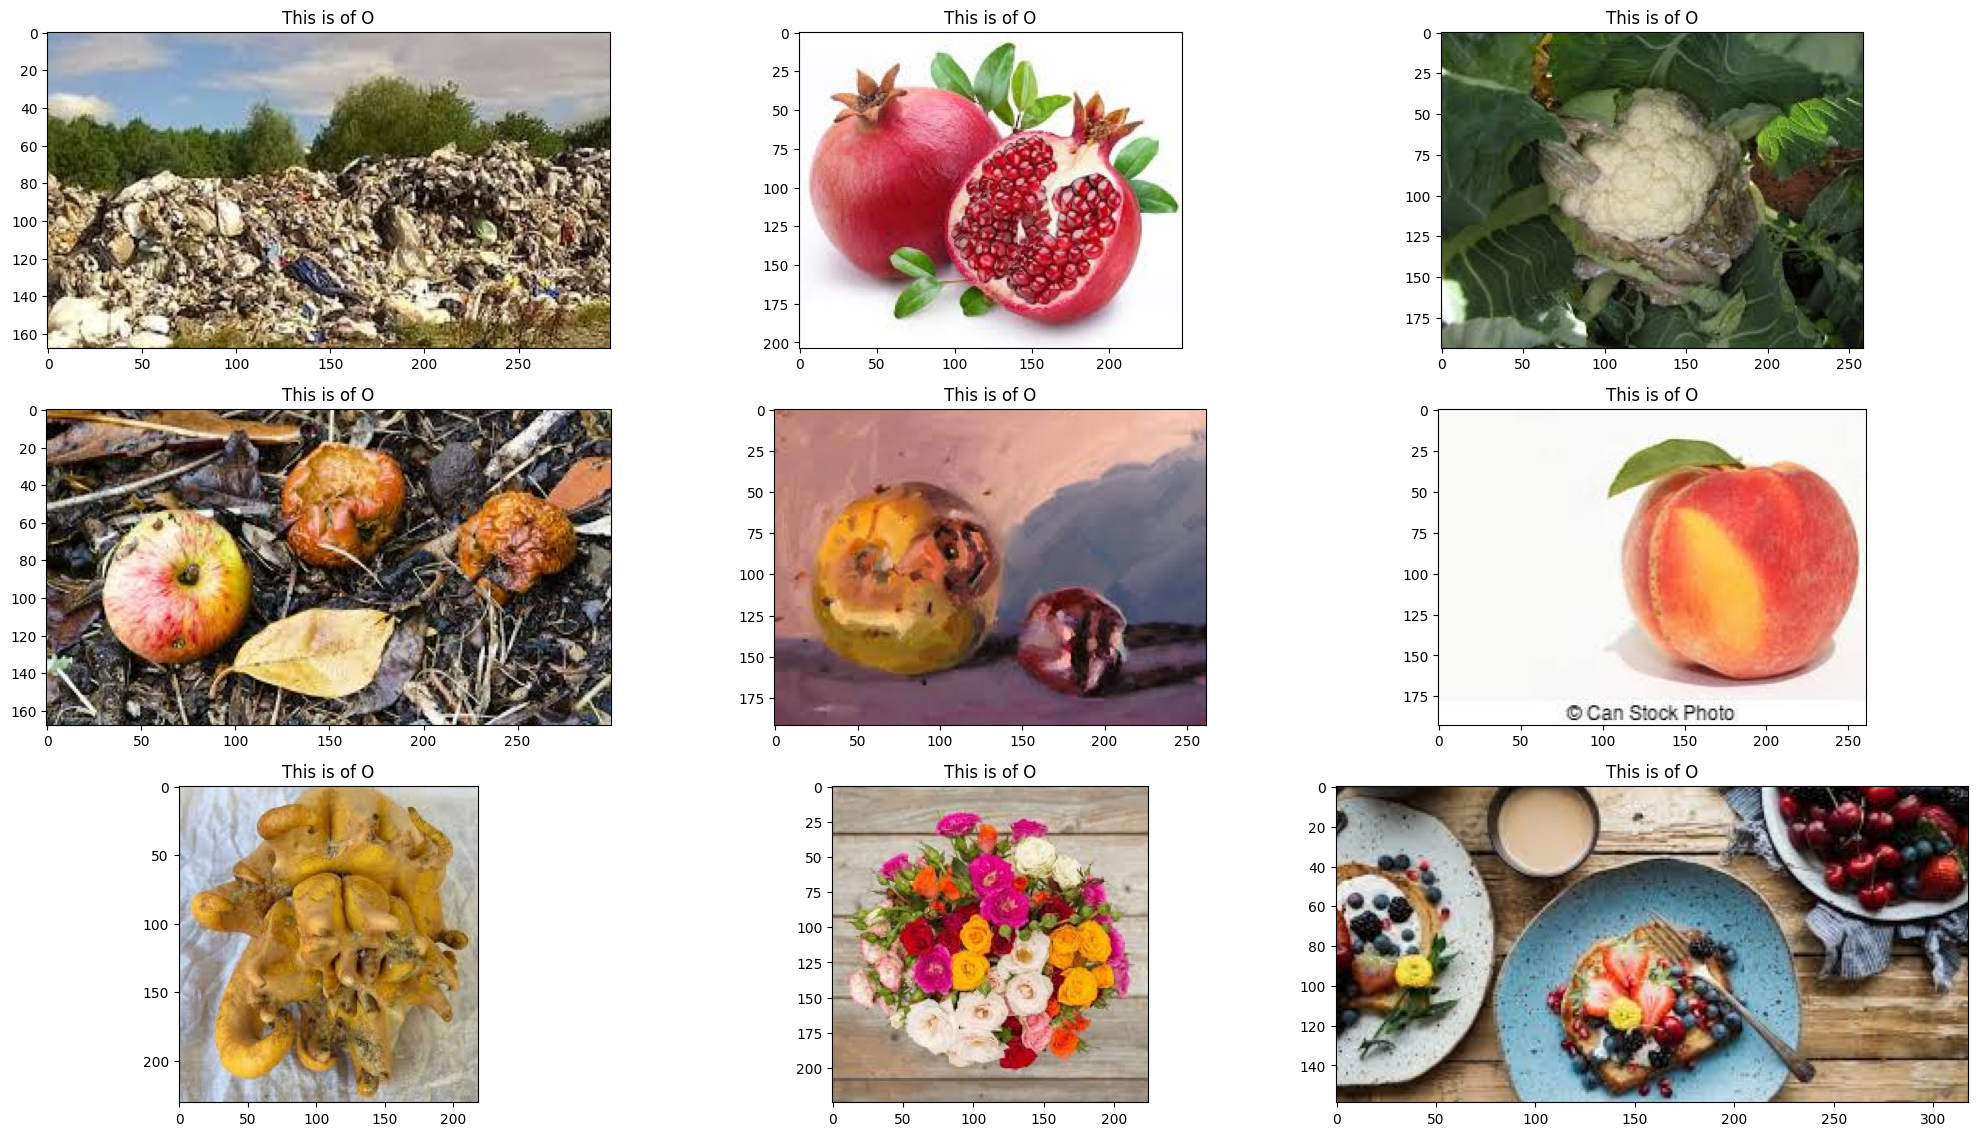

In [ ]:
plt.figure (figsize=(20, 15))
for i in range(9):
  plt.subplot(4, 3,(i%12)+1)
  index = np.random.randint(1500)
  plt.title('This is of {0}'.format(data.label[index]))
  plt.imshow(data.image[index])
  plt.tight_layout()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.add(Dense(2))
model.add(Activation('sigmoid'))


model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics =  ["accuracy"])
batch_size = 64

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,189 (84.92 MB)

 Trainable params: 22,261,189 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode =  "rgb",
    class_mode =  "categorical")

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode =  "rgb",
    class_mode =  "categorical")





Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=train_generator)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 147s 383ms/step - accuracy: 0.5493 - loss: 0.6783 - val_accuracy: 0.5569 - val_loss: 0.6025
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 88s 249ms/step - accuracy: 0.6633 - loss: 0.6595 - val_accuracy: 0.8117 - val_loss: 0.5859
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 86s 243ms/step - accuracy: 0.7409 - loss: 0.6065 - val_accuracy: 0.5328 - val_loss: 0.6743
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 88s 250ms/step - accuracy: 0.6119 - loss: 0.6762 - val_accuracy: 0.7754 - val_loss: 0.5939
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 86s 244ms/step - accuracy: 0.7356 - loss: 0.6107 - val_accuracy: 0.7378 - val_loss: 0.6043
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 89s 253ms/step - accuracy: 0.7549 - loss: 0.5906 - val_accuracy: 0.6725 - val_loss: 0.6181
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 89s 252ms/step - accuracy: 0.6962 - loss: 0.6178 - val_accuracy: 0.5603 - val_loss: 0.6889
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 88s 249ms/step - accuracy: 0.5654 - loss: 

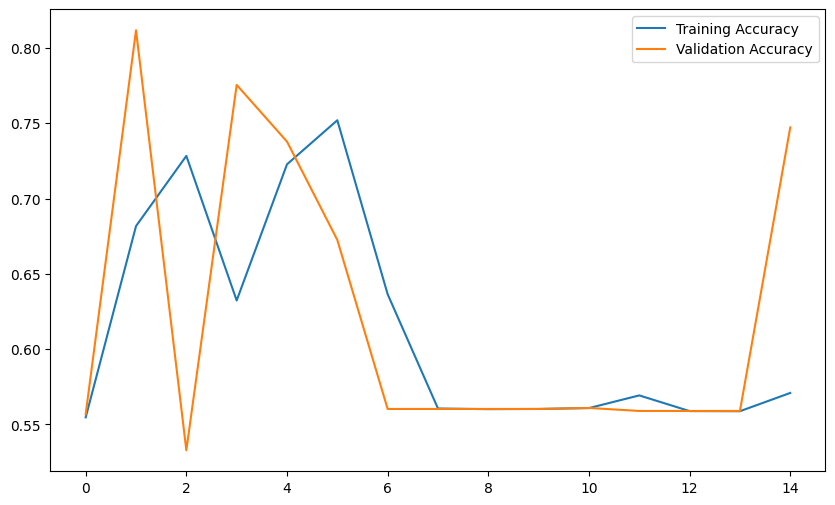

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

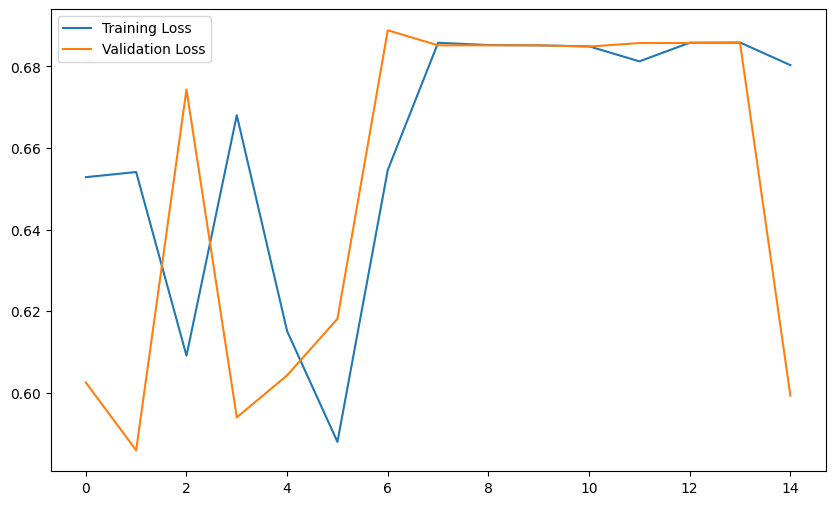

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('This image shown is Recyclable Waste')
  elif result == 1:
    print('This image shown is Organic Watse')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
This image shown is Recyclable Waste


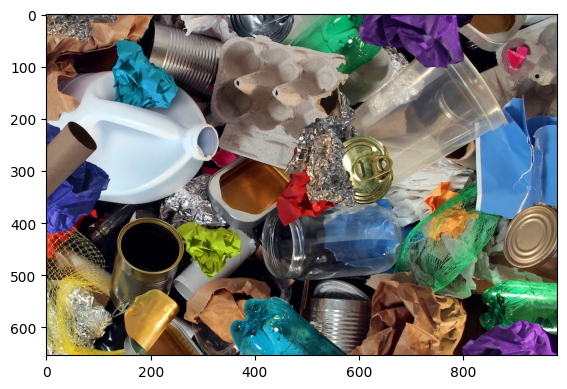

In [ ]:
test_img = cv2.imread('/content/1243.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This image shown is Recyclable Waste


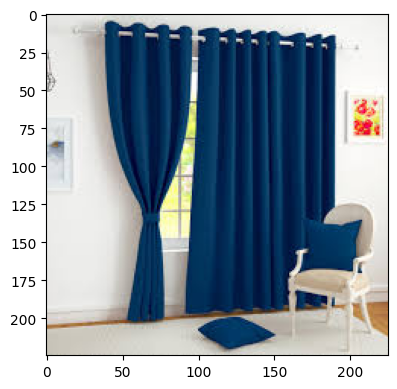

In [ ]:
test_img = cv2.imread('/content/456.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image shown is Organic Watse


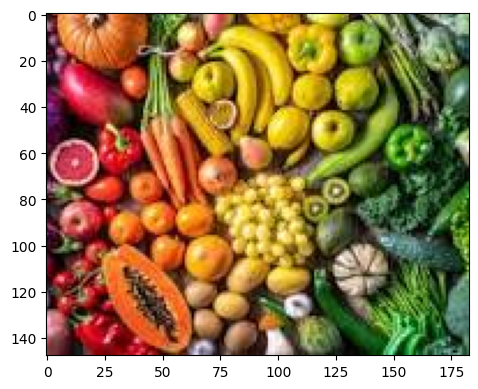

In [ ]:
test_img = cv2.imread('/content/789.jpg')
predict_fun(test_img)